<a href="https://colab.research.google.com/github/ai-studio-google-3a/youtube-video-virality-prediction/blob/ExploratoryAnalysis/YouTube_Video_Virality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Google Team 3A Google Colab Notebook**

Import Datatset and Tools

In [27]:
import pandas as pd
import numpy as np
from google.colab import files
from datetime import datetime

# # Load Dataset Here
df = pd.read_csv("US_youtube_trending_data.csv", on_bad_lines='skip', engine='python')
#The on_bad_lines argument will skip any malformed lines and the engine argument set to python will use the python parsing engine, which is more flexible


# Exploratory Data Analysis

In [28]:
print(df.shape)
df.head()

(268781, 16)


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [29]:
# Delete Features that are not needed

df = df.drop(columns=['tags'])
df = df.drop(columns=['video_id'])
df = df.drop(columns=['channelId'])
df = df.drop(columns=['thumbnail_link'])

# Cleaning (removing videos with comments and ratings disabled)

df = df[df['comments_disabled'] == False]
df = df[df['ratings_disabled'] == False]
df.head()

,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,2038853,353787,2628,40221,False,False,I left youtube for a month and this is what ha...
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,10,2020-08-12T00:00:00Z,496771,23251,1856,7647,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,26,2020-08-12T00:00:00Z,1123889,45802,964,2196,False,False,Transforming The LaBrant Family's empty white ...


In [30]:
def calculate_time_to_trend(row):
    trending_date = datetime.strptime(row['trending_date'], '%Y-%m-%dT%H:%M:%SZ')
    published_at = datetime.strptime(row['publishedAt'], '%Y-%m-%dT%H:%M:%SZ')
    time_difference = (trending_date - published_at).total_seconds() / 60  # Convert to minutes
    return time_difference

df['time_to_trend_minutes'] = df.apply(calculate_time_to_trend, axis=1)
df.head()


,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,time_to_trend_minutes
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,279.766667
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare...",419.833333
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,2038853,353787,2628,40221,False,False,I left youtube for a month and this is what ha...,445.900000
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,10,2020-08-12T00:00:00Z,496771,23251,1856,7647,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,441.083333
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,26,2020-08-12T00:00:00Z,1123889,45802,964,2196,False,False,Transforming The LaBrant Family's empty white ...,529.916667


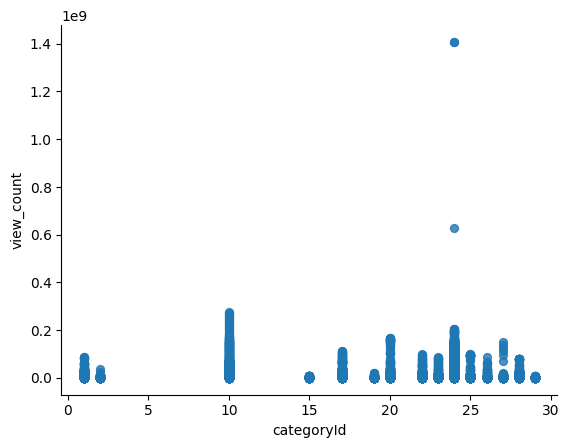

In [31]:
# categoryId vs view_count

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='categoryId', y='view_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

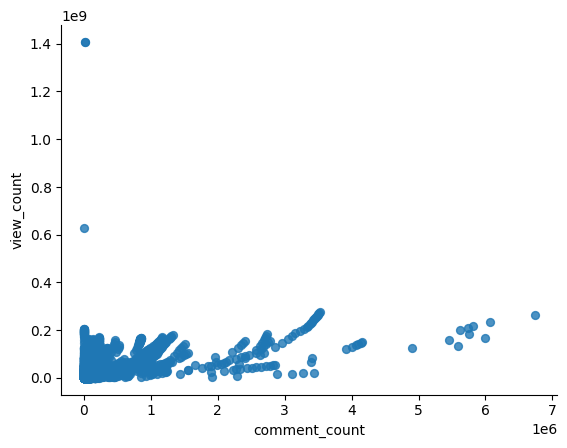

In [32]:
# Comment vs View Count

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='comment_count', y='view_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [33]:
# Time of Day

# 0 = morning, 1 = afternoon, 2 = night
def calculate_time_of_day(row):
    published_at = datetime.strptime(row['publishedAt'], '%Y-%m-%dT%H:%M:%SZ')
    time_difference = (published_at).hour
    if (time_difference < 10):
        return 0
    elif (time_difference < 17):
        return 1
    return 2;

df['time_posted'] = df.apply(calculate_time_of_day, axis=1)
df.head()

,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,time_to_trend_minutes,time_posted
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,279.766667,2
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare...",419.833333,2
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,2038853,353787,2628,40221,False,False,I left youtube for a month and this is what ha...,445.900000,1
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,10,2020-08-12T00:00:00Z,496771,23251,1856,7647,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,441.083333,1
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,26,2020-08-12T00:00:00Z,1123889,45802,964,2196,False,False,Transforming The LaBrant Family's empty white ...,529.916667,1


# Calculate Engagement Features

In [45]:
# Calculate Engagement Rate (Likes + Dislikes + No. of Comments / View Count)

df['engagement_rate'] = round((df['likes'] + df['comment_count']) / df['view_count'], 6)
df.head()


,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,time_to_trend_minutes,time_posted,engagement_rate,comment_view_ratio,is_viral
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,279.766667,2,0.126911,0.023315,1
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare...",419.833333,2,0.068560,0.006948,1
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,2038853,353787,2628,40221,False,False,I left youtube for a month and this is what ha...,445.900000,1,0.193250,0.019727,1
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,10,2020-08-12T00:00:00Z,496771,23251,1856,7647,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,441.083333,1,0.062198,0.015393,0
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,26,2020-08-12T00:00:00Z,1123889,45802,964,2196,False,False,Transforming The LaBrant Family's empty white ...,529.916667,1,0.042707,0.001954,1


In [47]:
# Calculate engagement rate
df['engagement_rate'] = round((df['likes'] + df['comment_count']) / df['view_count'], 6)

# Identify rows where 'engagement_rate' is infinity
inf_rows = df[np.isinf(df['engagement_rate'])]

# Print the 'likes', 'comment_count', and 'view_count' columns for those rows
print(inf_rows[['likes', 'comment_count', 'view_count']])

        likes  comment_count  view_count
15289    4257            240           0
15577    4420            261           0
22415   10785            264           0
137488   8569            504           0
137724   8786            520           0
137965   8994            538           0
199584  90325           1638           0
199804  92348           1725           0
200038  93578           1764           0
200281  94923           1819           0
200515  96043           1856           0
200729  96843           1902           0
200964  97284           1920           0
201182  97565           1931           0


In [41]:
# Like - Dislike Ratio
# df['like_dislike_ratio'] = df['likes'] / (df['dislikes'])

# Comment - View Ratio
df['comment_view_ratio'] = round(df['comment_count'] / df['view_count'], 6)
has_inf = np.isinf(df['comment_view_ratio']).any()


<ipython-input-41-f7bfd06117ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_view_ratio'] = round(df['comment_count'] / df['view_count'], 6)


In [42]:
df.loc[:, 'comment_view_ratio'] = np.where(df['view_count'] == 0, 0, round(df['comment_count'] / df['view_count'], 6))

has_inf = np.isinf(df['comment_view_ratio']).any()

print("Any infinite values in 'comment_view_ratio'?:", has_inf)

Any infinite values in 'comment_view_ratio'?: False


# Define Viral vs. Trending Thresholds

In [36]:
# Define thresholds for trending & viral videos
# viral = 1,000,000 views in 24 hours
viral_threshold = 1000000

# Create trending/viral labels (1 = is viral/trending, 0 = isn't viral/trending)
df['is_viral'] = (df['view_count'] >= viral_threshold).astype(int)

df.head()

,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,time_to_trend_minutes,time_posted,engagement_rate,comment_view_ratio,is_viral
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,279.766667,2,0.126911,0.023315,1
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare...",419.833333,2,0.068560,0.006948,1
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,2038853,353787,2628,40221,False,False,I left youtube for a month and this is what ha...,445.900000,1,0.193250,0.019727,1
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,10,2020-08-12T00:00:00Z,496771,23251,1856,7647,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,441.083333,1,0.062198,0.015393,0
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,26,2020-08-12T00:00:00Z,1123889,45802,964,2196,False,False,Transforming The LaBrant Family's empty white ...,529.916667,1,0.042707,0.001954,1



#*---- Next steps: split data into training/testing sets ?*


# Split Data (Training vs. Testing Sets)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# # Next steps - split data into training/testing sets ?
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)
df = df.dropna()


# Select features to use in the model
X = df[['time_to_trend_minutes', 'time_posted', 'engagement_rate', 'comment_view_ratio']]
y = df['view_count']

# # Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Missing values in each column:
 title                    0
publishedAt              0
channelTitle             0
categoryId               0
trending_date            0
view_count               0
likes                    0
dislikes                 0
comment_count            0
comments_disabled        0
ratings_disabled         0
description              0
time_to_trend_minutes    0
time_posted              0
engagement_rate          0
comment_view_ratio       0
is_viral                 0
dtype: int64


In [46]:
X = df[['time_to_trend_minutes', 'time_posted', 'engagement_rate', 'comment_view_ratio']]

# Check for infinite values in the DataFrame
has_inf = np.isinf(X).any()

# Print the result for each column
print("Any infinite values in 'time_to_trend_minutes'?:", has_inf['time_to_trend_minutes'])
print("Any infinite values in 'time_posted'?:", has_inf['time_posted'])
print("Any infinite values in 'engagement_rate'?:", has_inf['engagement_rate'])
print("Any infinite values in 'comment_view_ratio'?:", has_inf['comment_view_ratio'])

Any infinite values in 'time_to_trend_minutes'?: False
Any infinite values in 'time_posted'?: False
Any infinite values in 'engagement_rate'?: True
Any infinite values in 'comment_view_ratio'?: False


In [39]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
# Metrics

# Print mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))

In [ ]:
# Visualization
plt.plot(X_test, prediction, color='blue', linewidth=3);

plt.xlabel('comment_view_ratio');
plt.ylabel('view_count');

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

print("Shape of dataset after dropping missing values:", df_cleaned.shape)

# # Next steps - split data into training/testing sets ?

# Select features to use in the model
X = df[[ 'engagement_rate',
        'like_dislike_ratio', 'comment_view_ratio']]
print(X)

y = df['is_viral']

# # Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))